<a href="https://colab.research.google.com/github/SeanSDarcy2001/kanoldLab/blob/main/spectralClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    filename  stim  chroma_stft      rmse  spectral_centroid  \
160    1.wav     1     0.419088  0.000159        1727.597636   
182    2.wav     2     0.234359  0.005310        3762.007541   
170    3.wav     3     0.343899  0.021642        1750.287555   
140    4.wav     4     0.302972  0.033426        1508.066534   
124    5.wav     5     0.295167  0.044121        1355.255082   

     spectral_bandwidth      rolloff  zero_crossing_rate       mfcc1  \
160         1802.572011  3606.566828            0.150047 -866.144775   
182         2444.470584  6480.025968            0.228926 -436.040222   
170         2244.958108  3799.386874            0.056829 -346.592499   
140         2085.998849  3277.451394            0.050848 -318.625214   
124         1951.433671  2847.276722            0.045488 -313.705078   

          mfcc2  ...     mfcc11     mfcc12     mfcc13     mfcc14    mfcc15  \
160   75.817200  ...  -2.867641   3.416655  -4.286654   2.018000 -6.085381   
182    6.217912  ...  11.2

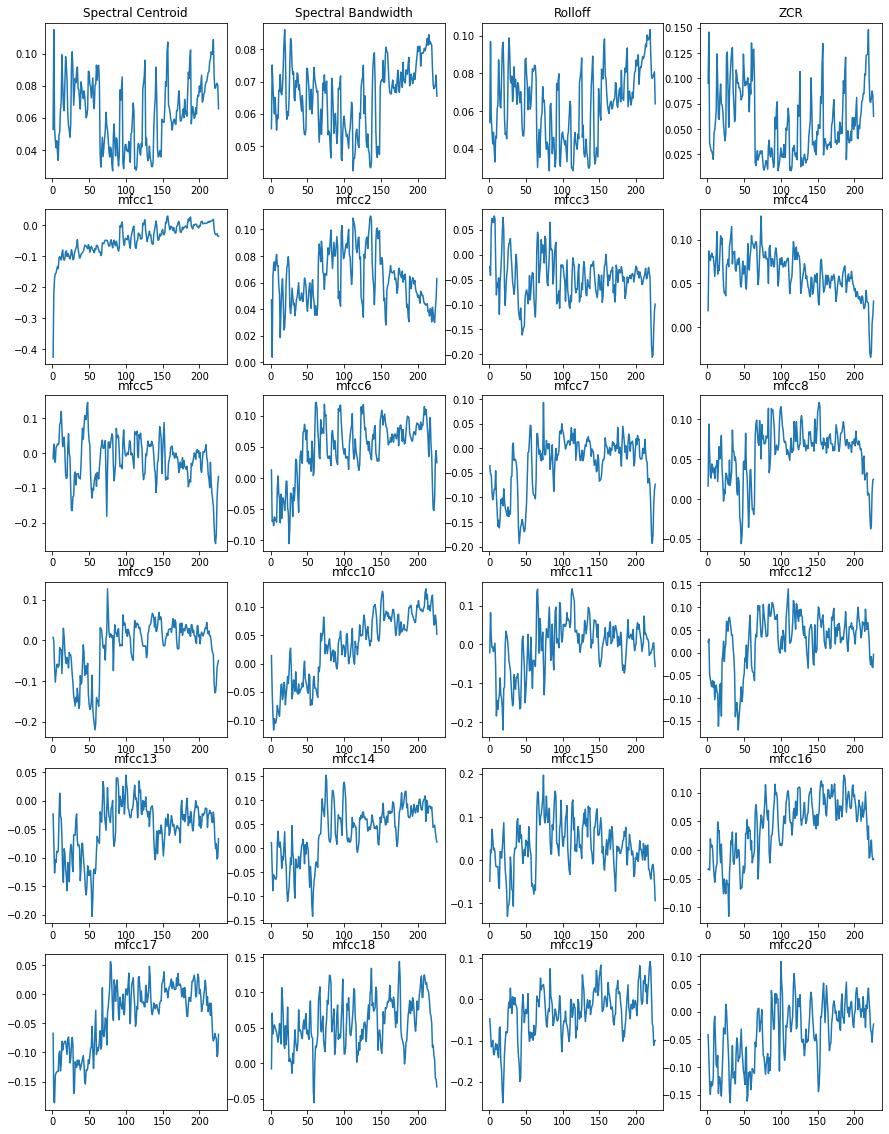

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
spectral_features = pd.read_csv('data.csv')
spectral_features = spectral_features.sort_values('stim')
print(spectral_features.head())

plt.figure(figsize=(15,20))
plt.subplot(6, 4, 1)
plt.title("Spectral Centroid")
plt.plot(spectral_features['stim'], spectral_features['spectral_centroid']/np.linalg.norm(spectral_features['spectral_centroid']))

plt.subplot(6, 4, 2)
plt.title("Spectral Bandwidth")
plt.plot(spectral_features['stim'], spectral_features['spectral_bandwidth']/np.linalg.norm(spectral_features['spectral_bandwidth']))

plt.subplot(6, 4, 3)
plt.title("Rolloff")
plt.plot(spectral_features['stim'], spectral_features['rolloff']/np.linalg.norm(spectral_features['rolloff']))

plt.subplot(6, 4, 4)
plt.title("ZCR")
plt.plot(spectral_features['stim'], spectral_features['zero_crossing_rate']/np.linalg.norm(spectral_features['zero_crossing_rate']))

for i in range(1, 21):
    plt.subplot(6, 4, 4 + i)
    plt.title(f'mfcc{i}')
    plt.plot(spectral_features['stim'], spectral_features[f'mfcc{i}']/np.linalg.norm(spectral_features[f'mfcc{i}']))


good
good
good


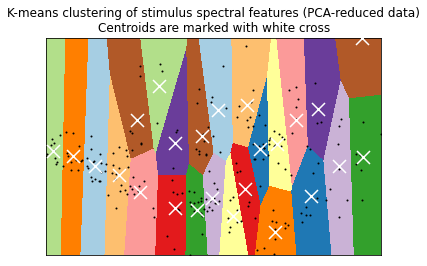

In [5]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

clusters = 25
n_digits = clusters

reduced_data = PCA(n_components=2).fit_transform(spectral_features.loc[:, ~spectral_features.columns.isin(['filename', 'stim'])])
print('good')
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)
print('good')

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .25  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
print('good')

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering of stimulus spectral features (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()